In [2]:
import torch
torch.cuda.is_available()

True

### 数値微分

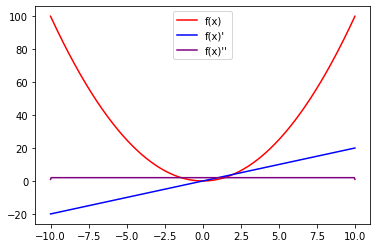

In [4]:
from matplotlib import pyplot as plt
import numpy as np
f = lambda x: x**2
N = 1000
x = np.linspace(-10, 10, N)
dx = 20/N
y = f(x)
dy = np.gradient(y, dx)
dy2 = np.gradient(dy, dx)

# x y
plt.plot(x, y, color='red', label='f(x)')
plt.plot(x, dy, color='blue', label="f(x)'")
plt.plot(x, dy2, color='purple', label="f(x)''")
plt.legend(loc='best')
plt.show()

### pandas groupby

In [6]:
import numpy as np
import pandas as pd
a1 = np.array([1] * 5 + [2] * 5).reshape(-1, 1)
a2 = np.array([0] * 5 + [1] * 5).reshape(-1, 1)
a3 = np.array([1] * 5 + [2] * 5).reshape(-1, 1)
df_test = pd.DataFrame(np.hstack([a1, a2, a3]), columns=['a1', 'a2', 'a3'])
df_test.groupby(['a2', 'a3']).apply(lambda x: (x**2).sum())

,,a1,a2,a3
a2,a3,,,
0,1,5,0,5
1,2,20,5,20


### 多項式回帰

rmse : 12.91705658510487
R2 : 0.8838261181927397


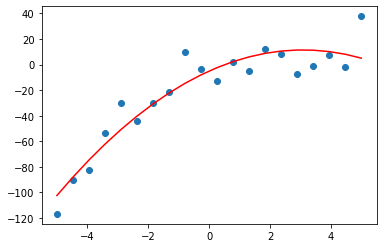

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x = np.linspace(-5, 5, 20)
y = 2 * x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(loc=0, scale=10, size=len(x))
 
# [a,b,c,..] to [[a], [b], [c]]
x = x[:, np.newaxis]
y = y[:, np.newaxis]

# 2次元の特徴量に変換
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)
 
# y = b0 + b1x + b2x^2 の b0～b2 を算出
model = LinearRegression()
model.fit(x_poly, y)
y_pred = model.predict(x_poly)
 
# 評価
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(f'rmse : {rmse}')
print(f'R2 : {r2}')
 
# 可視化
plt.scatter(x, y)
plt.plot(x, y_pred, color='r')
plt.show()

### Scipy stats uniform

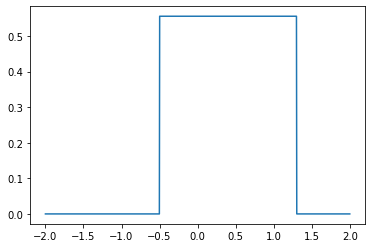

In [5]:
from scipy.stats import uniform

x = np.linspace(-2, 2, 1000)
# Uniform[-0.5, 1.3]
y = uniform.pdf(x, loc=-0.5, scale=1.8)

plt.plot(x, y)